# Example 14: RVT SRA with multiple motions and simulated profiles

Example with multiple input motions and simulated soil profiles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams['figure.dpi'] = 120

## Create a point source theory RVT motion

In [3]:
motions = [
    pysra.motion.SourceTheoryRvtMotion(5.0, 30, 'wna'),
    pysra.motion.SourceTheoryRvtMotion(6.0, 30, 'wna'),
    pysra.motion.SourceTheoryRvtMotion(7.0, 30, 'wna'),
]

for m in motions:
    m.calc_fourier_amps()

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [4]:
profile = pysra.site.Profile([
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=100), 10, 400),
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=200), 10, 450),
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=400), 30, 600),
    pysra.site.Layer(
        pysra.site.SoilType('Rock', 24., None, 0.01), 0, 1200),
])

## Create the site response calculator

In [5]:
calc = pysra.propagation.EquivalentLinearCalculator()

## Initialize the variations

In [6]:
var_thickness = pysra.variation.ToroThicknessVariation()
var_velocity = pysra.variation.DepthDependToroVelVariation.generic_model(
    'USGS C')
var_soiltypes = pysra.variation.SpidVariation(
    -0.5, std_mod_reduc=0.15, std_damping=0.30)

## Specify the output

In [7]:
freqs = np.logspace(-1, 2, num=500)

outputs = pysra.output.OutputCollection([
    pysra.output.ResponseSpectrumOutput(
        # Frequency
        freqs,
        # Location of the output
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05),
    pysra.output.ResponseSpectrumRatioOutput(
        # Frequency
        freqs,
        # Location in (denominator),
        pysra.output.OutputLocation('outcrop', index=-1),
        # Location out (numerator)
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05),
    pysra.output.InitialVelProfile(),
])

## Perform the calculation

In [8]:
count = 20
outputs.reset()
for i, p in enumerate(pysra.variation.iter_varied_profiles(
    profile,
    count,
    #var_thickness=var_thickness,
    var_velocity=var_velocity,
    #var_soiltypes=var_soiltypes
)):
    # Here we auto-descretize the profile for wave propagation purposes
    p = p.auto_discretize()
    for j, m in enumerate(motions):
        name = (f'p{i}', f'm{j}')
        calc(m, p, p.location('outcrop', index=-1))
        outputs(calc, name=name)

## Plot the outputs

Create a few plots of the output.

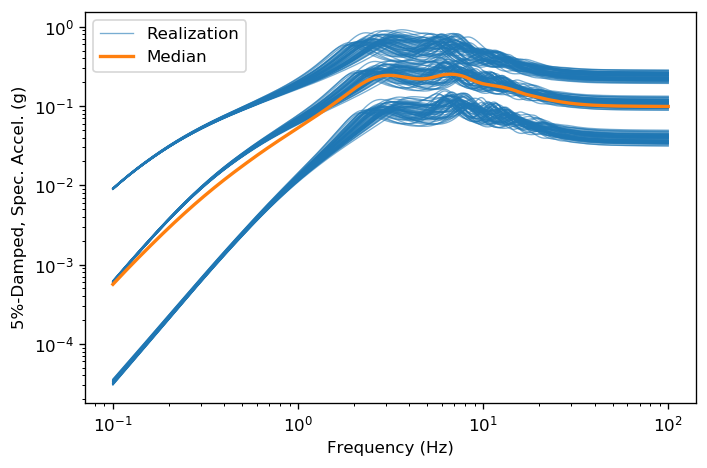

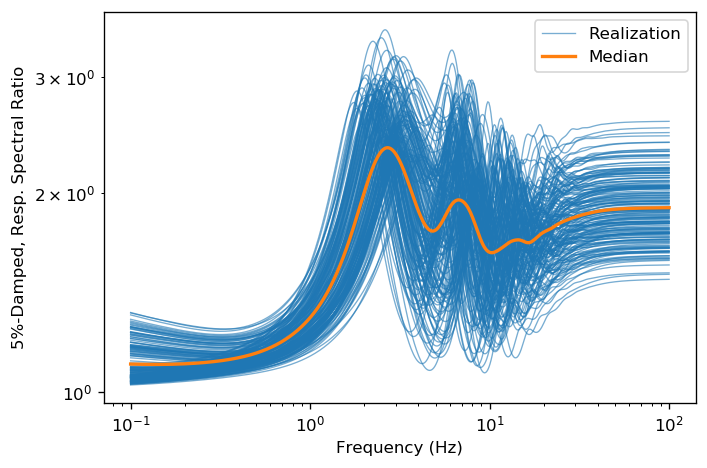

In [9]:
for o in outputs[:-1]:
    ax = o.plot()

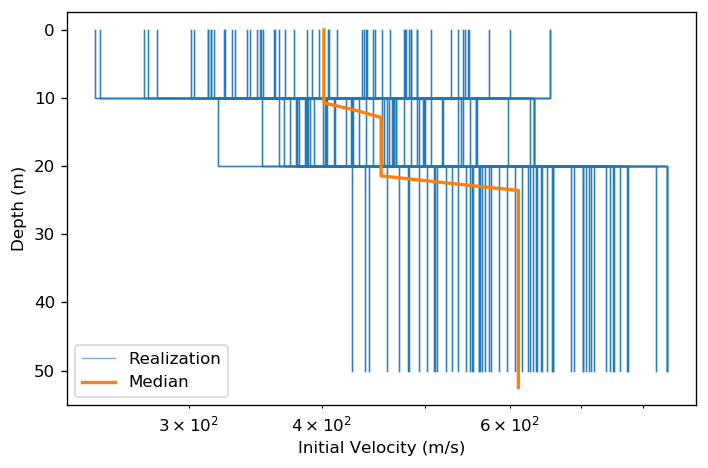

In [10]:
ax = outputs[-1].plot()

## Manipulating output as dataframe

If a `tuple` is passed as the output name, it is used to create a `pandas.MultiIndex` columns.

In [11]:
df = outputs[1].to_dataframe()
df

p0                            p1                      \
                  m0        m1        m2        m0        m1        m2   
0.100000    1.223372  1.075038  1.047381  1.211816  1.070127  1.043154   
0.101394    1.222576  1.074976  1.047743  1.211017  1.070068  1.043489   
0.102807    1.221783  1.074918  1.048110  1.210221  1.070015  1.043827   
0.104240    1.220993  1.074867  1.048480  1.209427  1.069967  1.044169   
0.105693    1.220206  1.074821  1.048855  1.208637  1.069925  1.044514   
...              ...       ...       ...       ...       ...       ...   
94.613238   1.896621  1.825774  1.701913  1.627058  1.592183  1.479977   
95.932095   1.896711  1.825861  1.702020  1.627146  1.592270  1.480075   
97.269336   1.896799  1.825945  1.702123  1.627232  1.592354  1.480169   
98.625218   1.896884  1.826027  1.702224  1.627315  1.592436  1.480261   
100.000000  1.896967  1.826106  1.702321  1.627395  1.592515  1.480349   

                  p2                            p3  ...       p56       p57  \
                  m0        m1        m2        m0  ...        m2        m0   
0.100000    1.270798  1.088207  1.054808  1.153885  ...  1.045691  1.174780   
0.101394    1.269736  1.088119  1.055222  1.153444  ...  1.046042  1.174222   
0.102807    1.268677  1.088038  1.055641  1.153005  ...  1.046398  1.173667   
0.104240    1.267622  1.087963  1.056064  1.152566  ...  1.046756  1.173114   
0.105693    1.266571  1.087894  1.056492  1.152130  ...  1.047119  1.172564   
...              ...       ...       ...       ...  ...       ...       ...   
94.613238   1.895304  1.815388  1.648485  1.981069  ...  2.031573  2.086007   
95.932095   1.895396  1.815486  1.648600  1.981126  ...  2.031674  2.086046   
97.269336   1.895486  1.815580  1.648712  1.981182  ...  2.031771  2.086084   
98.625218   1.895573  1.815671  1.648820  1.981236  ...  2.031865  2.086121   
100.000000  1.895657  1.815760  1.648926  1.981288  ...  2.031957  2.086156   

                                     p58                           p59  \
                  m1        m2        m0        m1        m2        m0   
0.100000    1.059480  1.037013  1.143184  1.048834  1.030229  1.147280   
0.101394    1.059444  1.037305  1.142759  1.048812  1.030471  1.146829   
0.102807    1.059412  1.037599  1.142336  1.048793  1.030715  1.146379   
0.104240    1.059385  1.037897  1.141914  1.048779  1.030961  1.145932   
0.105693    1.059363  1.038198  1.141495  1.048769  1.031211  1.145486   
...              ...       ...       ...       ...       ...       ...   
94.613238   1.968497  1.852958  1.776599  1.713301  1.651320  1.807840   
95.932095   1.968533  1.853017  1.776663  1.713354  1.651386  1.807889   
97.269336   1.968567  1.853074  1.776726  1.713405  1.651450  1.807936   
98.625218   1.968600  1.853130  1.776786  1.713455  1.651513  1.807981   
100.000000  1.968632  1.853183  1.776845  1.713503  1.651573  1.808026   

                                
                  m1        m2  
0.100000    1.049973  1.030703  
0.101394    1.049948  1.030949  
0.102807    1.049928  1.031196  
0.104240    1.049911  1.031447  
0.105693    1.049900  1.031700  
...              ...       ...  
94.613238   1.737234  1.665845  
95.932095   1.737274  1.665897  
97.269336   1.737312  1.665947  
98.625218   1.737349  1.665996  
100.000000  1.737384  1.666043  

[500 rows x 180 columns]

Lets names to the dataframe and transform into a long format. Pandas works better on long formatted tables.

In [12]:
# Add names for clarity
df.columns.names = ('profile', 'motion')
df.index.name = 'freq'
# Transform into a long format
df = df.reset_index().melt(id_vars='freq')
df

,freq,profile,motion,value
0,0.100000,p0,m0,1.223372
1,0.101394,p0,m0,1.222576
2,0.102807,p0,m0,1.221783
3,0.104240,p0,m0,1.220993
4,0.105693,p0,m0,1.220206
...,...,...,...,...
89995,94.613238,p59,m2,1.665845
89996,95.932095,p59,m2,1.665897
89997,97.269336,p59,m2,1.665947
89998,98.625218,p59,m2,1.665996


In [13]:
def calc_stats(group):
    ln_value = np.log(group['value'])

    median = np.exp(np.mean(ln_value))
    ln_std = np.std(ln_value)

    return pd.Series({'median': median, 'ln_std': ln_std})

stats = df.groupby(['freq', 'motion']).apply(calc_stats)
stats

median    ln_std
freq       motion                    
0.100000   m0      1.201134  0.042359
           m1      1.067970  0.015052
           m2      1.042698  0.009962
0.101394   m0      1.200453  0.042178
           m1      1.067919  0.015028
...                     ...       ...
98.625218  m1      1.910216  0.100027
           m2      1.789632  0.098667
100.000000 m0      2.007249  0.111433
           m1      1.910274  0.100026
           m2      1.789710  0.098666

[1500 rows x 2 columns]

In [14]:
stats = stats\
    .reset_index('motion')\
    .pivot(columns='motion')\
    .swaplevel(0, 1, axis=1)\
    .sort_index(axis=1)
stats

motion            m0                  m1                  m2          
              ln_std    median    ln_std    median    ln_std    median
freq                                                                  
0.100000    0.042359  1.201134  0.015052  1.067970  0.009962  1.042698
0.101394    0.042178  1.200453  0.015028  1.067919  0.010028  1.043028
0.102807    0.041998  1.199774  0.015005  1.067872  0.010094  1.043360
0.104240    0.041818  1.199097  0.014983  1.067831  0.010161  1.043697
0.105693    0.041638  1.198423  0.014961  1.067795  0.010229  1.044036
...              ...       ...       ...       ...       ...       ...
94.613238   0.111440  2.006992  0.100029  1.910031  0.098670  1.789384
95.932095   0.111438  2.007059  0.100028  1.910095  0.098669  1.789469
97.269336   0.111436  2.007124  0.100027  1.910156  0.098668  1.789552
98.625218   0.111435  2.007187  0.100027  1.910216  0.098667  1.789632
100.000000  0.111433  2.007249  0.100026  1.910274  0.098666  1.789710

[500 rows x 6 columns]

Access the properties of each motion like:

In [15]:
stats['m0']

,ln_std,median
freq,,
0.100000,0.042359,1.201134
0.101394,0.042178,1.200453
0.102807,0.041998,1.199774
0.104240,0.041818,1.199097
0.105693,0.041638,1.198423
...,...,...
94.613238,0.111440,2.006992
95.932095,0.111438,2.007059
97.269336,0.111436,2.007124


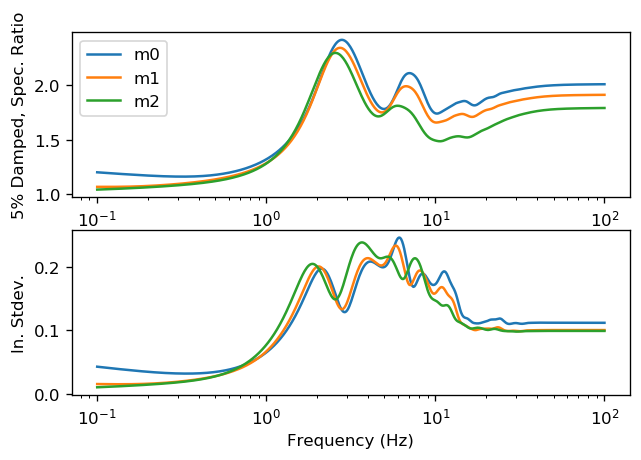

In [16]:
fig, axes = plt.subplots(nrows=2, subplot_kw={'xscale': 'log'})

for name, g in stats.groupby(level=0, axis=1):
    for ax, key in zip(axes, ['median', 'ln_std']):
        ax.plot(g.index, g[(name, key)], label=name)
        

axes[0].set(ylabel='5% Damped, Spec. Ratio')
axes[0].legend()

axes[1].set(ylabel='ln. Stdev.', xlabel='Frequency (Hz)')

fig;